In [86]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [87]:
import src.dbscan as dbscan
from sklearn.cluster import DBSCAN as skDBSCAN # for comparison

## Initalize Data

In [88]:
data = datasets.make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=1.05, random_state=40)

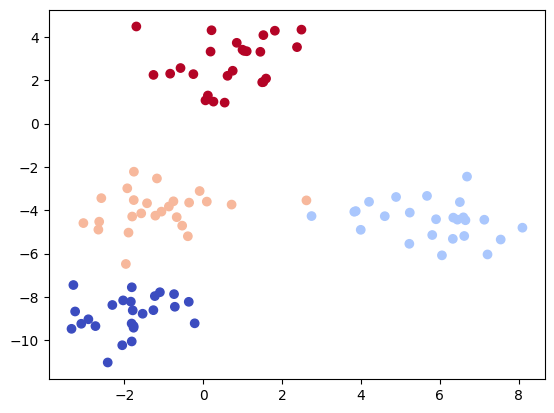

In [89]:
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='coolwarm')

In [90]:
eps = 1.5
min_samples = 5
db_result = dbscan.dbscan(data[0], eps, min_samples)
db_sk = skDBSCAN(eps=eps, min_samples=min_samples).fit(data[0])

# of clusters of sklearn DBSCAN:  5
# of clusters of Our DBSCAN:  17


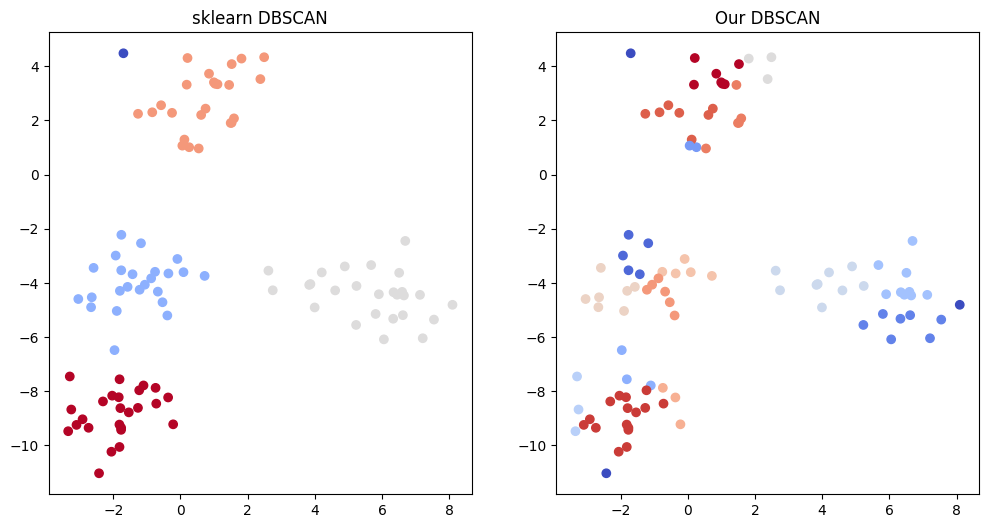

In [91]:
fig, ax  = plt.subplots(1, 2, figsize=(12, 6))

ax[0].scatter(data[0][:,0], data[0][:,1], c=db_sk.labels_, cmap='coolwarm')
ax[0].set_title('sklearn DBSCAN')
print("# of clusters of sklearn DBSCAN: ", len(np.unique(db_sk.labels_)))

ax[1].scatter(data[0][:,0], data[0][:,1], c=db_result, cmap='coolwarm')
ax[1].set_title('Our DBSCAN')
print("# of clusters of Our DBSCAN: ", len(np.unique(db_result)))

In [92]:
db_result

array([ 1.,  2.,  3.,  4.,  0.,  1., 10.,  5.,  5.,  6.,  7.,  8., 12.,
        1.,  5.,  1.,  5.,  4., 10., 16.,  9.,  7.,  2.,  7., 10., 11.,
        9., 12., 13., 15.,  0., 14., 14., 15.,  9., 14., 16., 12.,  1.,
        9., 16., 16., 12.,  6., 15., 16.,  7., 15.,  8.,  9., 15., 15.,
       10.,  5., 16., 15., 13., 11.,  7., 12., 15.,  9., 10.,  6.,  7.,
       15., 15., 13.,  2.,  5.,  2., 14., 14., 15., 16., 15.,  2., 15.,
       13.,  3., 11.,  5., 15., 12., 15.,  8.,  7.,  4.,  7.,  5.,  2.,
       15.,  5., 14.,  9.,  0.,  2., 13., 14.,  7.])